# Survival, risk and hazard

This page discusses the relationship between survival curves, Relative Risk
(RR) and the Hazard Ratio (HR).

Let's start with a couple of idealized survival curves.

As usual, we'll show the working with some simple code as we go along, but you
should be able to follow the page even if you don't follow the code.

In [1]:
# Get the libraries we will use for this page.
import numpy as np  # Working with arrays.
import matplotlib.pyplot as plt  # Plotting

Our example survival curves will be for two treatments, A and B, over a period
of 10 years.

We start by making an array to store the times at which we have measured
survival, in our idealized example.

In [2]:
dt = 0.001  # The gap between measurements.
# Times at which we imagine our measurements to have taken place (in years).
t = np.arange(0, stop=10, step=dt)
# Show the first 10 times.
t[:10]

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])

Next we make a survival curve for treatment A.   The survival curve gives the
proportion of people still alive at any particular time $t$.

In [3]:
# Values for a simple curve of survival after treatment A.
# The maths of the equation is not much relevant here - it's just a way to
# generate a typical-looking survival curve.
survival_A = np.e ** -(t / 3)

We plot survival for A:

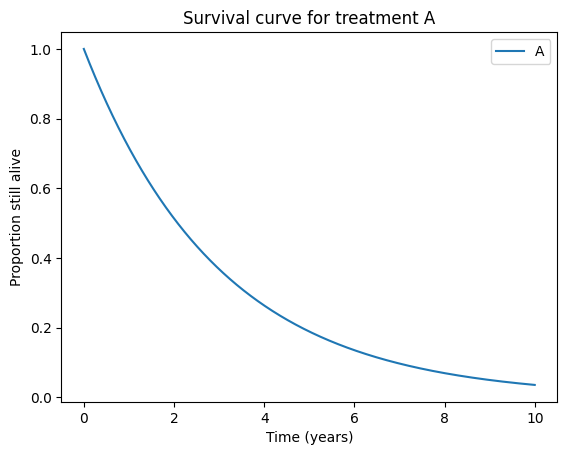

In [4]:
plt.plot(t, survival_A, label='A')
plt.xlabel('Time (years)')
plt.ylabel('Proportion still alive')
plt.title('Survival curve for treatment A')
plt.legend();

Now let's make another idealized curve for treatment B, and plot it together with A.

In [5]:
# Values for a simple curve of survival after treatment B.
survival_B = np.e ** -(t / 1.25)

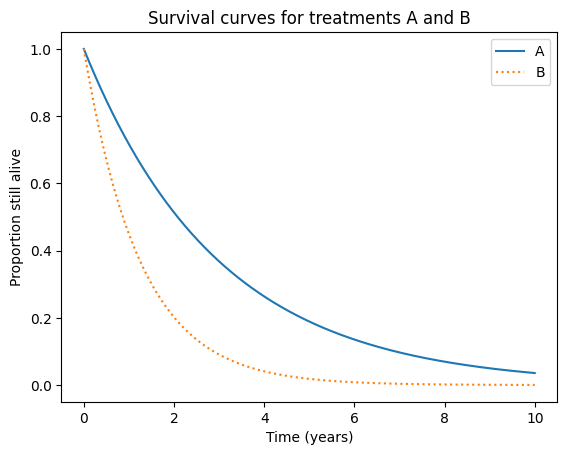

In [6]:
plt.plot(t, survival_A, label='A')
plt.plot(t, survival_B, linestyle=':', label='B')
plt.xlabel('Time (years)')
plt.ylabel('Proportion still alive')
plt.title('Survival curves for treatments A and B')
plt.legend();

## Relative risk

Relative risk (RR) is, as the name implies, one risk divided by another risk.
A typical RR is the relative risk of *death*.   For example, at any particular
time $t$ we can calculate the risk (proportion) of deaths with treatment
A — call this $p$ — and the risk of death for treatment B — call this $r$.  The
RR for that time is $r / p$.

For example, consider the survival values for A and B at 5 years.

In [7]:
# Number of times (and survival values)
N = len(t)
N

10000

In [8]:
# Value for 5 years is at the center of the array of values.
pos_5y = round(N / 2)
pos_5y

5000

In [9]:
print('Time (years) at mid-position', t[pos_5y])

Time (years) at mid-position 5.0


In [10]:
survival_A_5 = survival_A[pos_5y]  # Value for A at 5 years.
print('A survival at 5 years', survival_A_5)

A survival at 5 years 0.18887560283756183


In [11]:
survival_B_5 = survival_B[pos_5y]  # Value for B at 5 years.
print('B survival at 5 years', survival_B_5)

B survival at 5 years 0.018315638888734186


The risk of death is the survival proportion (above) subtracted from 1:

In [12]:
risk_A_5 = 1 - survival_A_5
risk_B_5 = 1 - survival_B_5

The RR of death with A relative to B is:

In [13]:
rr_5 = risk_A_5 / risk_B_5
print('Relative risk at 5 years', rr_5)

Relative risk at 5 years 0.8262578373401469


This tells us that those in treatment A have 0.82 (82%) of the risk of death
suffered in B.  Put another way, A has an 18% relative reduction in death
compared to B, at 5 years.

We can plot RR over time, by first calculating the *death* curves (which are
just the survival curves subtracted from 1):

In [14]:
death_A = 1 - survival_A
death_B = 1 - survival_B

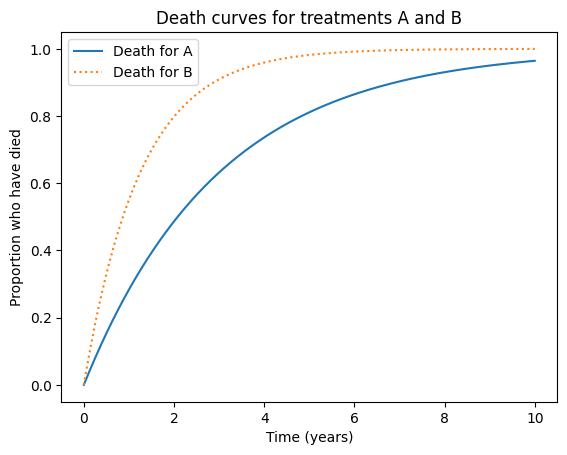

In [15]:
plt.plot(t, death_A, label='Death for A')
plt.plot(t, death_B, linestyle=':', label='Death for B')
plt.xlabel('Time (years)')
plt.ylabel('Proportion who have died')
plt.title('Death curves for treatments A and B')
plt.legend();

The death curves are the survival curves vertically flipped.

The RRs are the death values for A divided by those for B:

In [16]:
# We'll get a warning about dividing by 0 because deaths were 0
# at the beginning.
rr_A_rel_B = death_A / death_B

/var/folders/vr/b3dbt6vd3pd73sjc_t9xj87r0000gn/T/ipykernel_33837/2715193582.py:3: RuntimeWarning: invalid value encountered in divide
  rr_A_rel_B = death_A / death_B


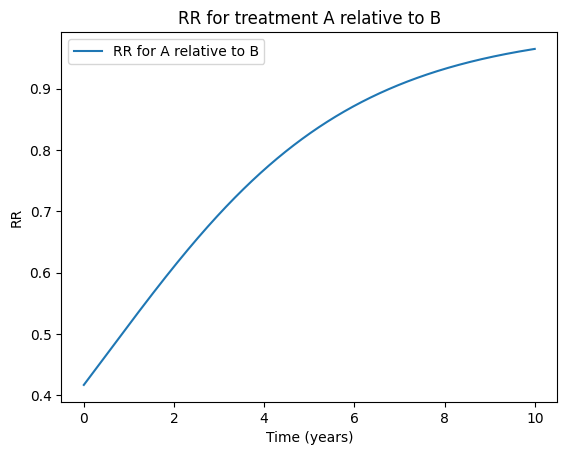

In [17]:
plt.plot(t, rr_A_rel_B, label='RR for A relative to B')
plt.xlabel('Time (years)')
plt.ylabel('RR')
plt.title('RR for treatment A relative to B')
plt.legend();

Notice that the RR changes over time.  In particular, early on, the death
curves are diverging quickly, and absolute values are small, so the RR is far
from 0. As the curves start to converge, over time, the RR approaches 1.  An RR
of 1 means that the relative risk of death is similar between A and B.


## On the hazard ratio

The Hazard Ratio (HR) is another way to compare survival (or, equivalently,
death) between two conditions.

The HR is the ratio of two *hazard rates*.  In our case, we will be comparing the hazard rates for treatments A and B.

The hazard rate for death, is the rate of death at some particular time,
divided by the proportion still alive at that time.

The rate of death at a particular time is the slope of the death function.

Because we've used a mathematical function to generate the survival (and
therefore death) curve, we could calculate that slope using calculus, and in
particular, by taking the *derivative* of the death curve, but let's reduce the
mathematics by doing this slope calculation *numerically*.  We take slope at
any particular time to be the difference between the current death value and
the next, divided by the difference in time
([slope](https://en.wikipedia.org/wiki/Slope) is change in y-axis value divided
by change in x-axis value, or *rise over run*).

Here is the death *rate* for A at 5 years;

In [18]:
death_rate_A_5 = (death_A[pos_5y + 1] - death_A[pos_5y]) / dt
print('Death rate for A at 5 years', death_rate_A_5)

Death rate for A at 5 years 0.06294804235584817


We can do also do this calculation with the `np.diff` function, that
calculates, for each element, the difference between the element and the
previous element in the array.

In [19]:
# Rate calculation for all values.
death_rate_A = np.diff(death_A) / dt
# Show that we get the same value for 5 years as we did above.
print('Death rate for A at 5 years', death_rate_A[pos_5y])

Death rate for A at 5 years 0.06294804235584817


In [20]:
# Death rate calculation for every time point of B.
death_rate_B = np.diff(death_B) / dt
# Show the first 10 values
death_rate_B[:10]

array([0.79968009, 0.7990406 , 0.79840162, 0.79776315, 0.7971252 ,
       0.79648775, 0.79585082, 0.79521439, 0.79457848, 0.79394307])

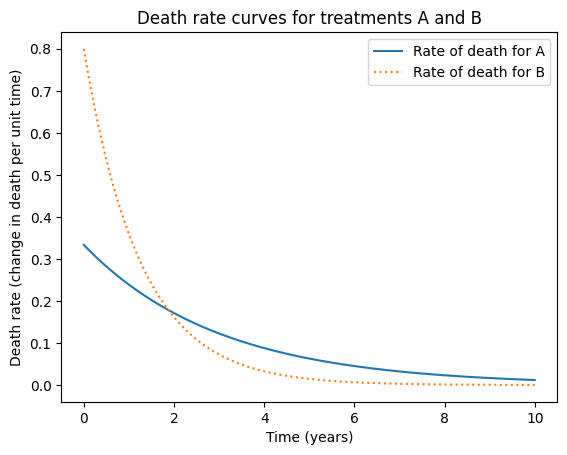

In [21]:
# For plotting, we have take into account that we have one less
# value in the rates than we do in the initial values, because we
# have taken the differences.
rate_t = t[:-1]  # Drop the last value for time.
plt.plot(rate_t, death_rate_A, label='Rate of death for A')
plt.plot(rate_t, death_rate_B, linestyle=':', label='Rate of death for B')
plt.xlabel('Time (years)')
plt.ylabel('Death rate (change in death per unit time)')
plt.title('Death rate curves for treatments A and B')
plt.legend();

Notice that A has a higher death rate than B in middle years, but this is
because there are more people at risk of death in A, because more people have
survived.  We therefore adjust the death rate (above) by dividing by the
survival values, to give the death *hazard rate*.   This is the death rate,
accounting for the proportion still at risk from death.  Therefore, for any
particular time, this gives the risk of death for those still alive.

In [22]:
# For the reasons above - we drop the last survival value.
hazard_rate_A = death_rate_A / survival_A[:-1]
hazard_rate_B = death_rate_B / survival_B[:-1]

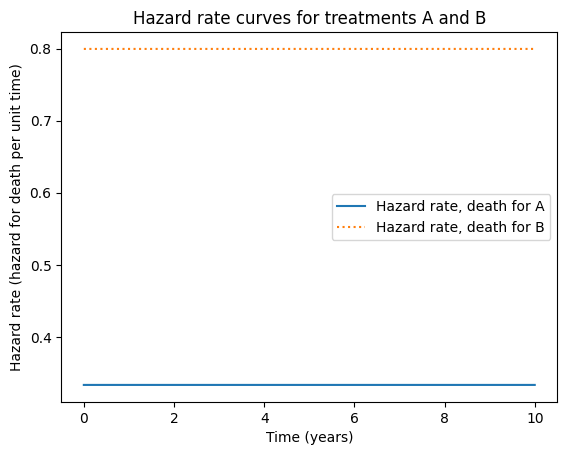

In [23]:
plt.plot(rate_t, hazard_rate_A, label='Hazard rate, death for A')
plt.plot(rate_t, hazard_rate_B, linestyle=':',
         label='Hazard rate, death for B')
plt.xlabel('Time (years)')
plt.ylabel('Hazard rate (hazard for death per unit time)')
plt.title('Hazard rate curves for treatments A and B')
plt.legend();

Notice that the hazard rates are the same at all times, for both treatments.  This is a mathematical artefact of the fact we used simple exponential functions to create the initial survival curves.  In general, and with more complicated survival curves, the hazard rates can vary over time.

The *hazard ratio (HR)* for (here) A relative to B is the *hazard rate* for A divided by the hazard rate for B:

array([0.41676389, 0.41676389, 0.41676389, ..., 0.41676389, 0.41676389,
       0.41676389])

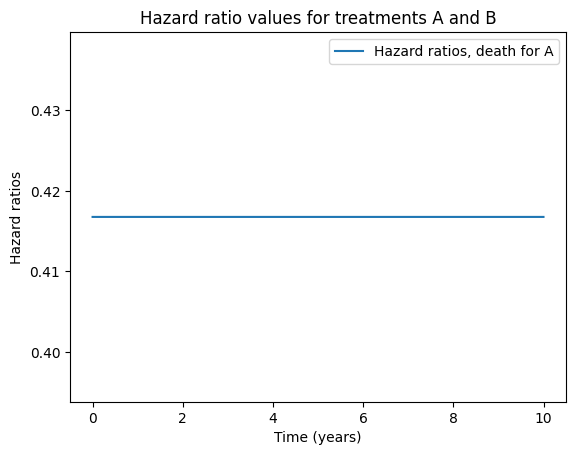

In [24]:
hazard_ratios = hazard_rate_A / hazard_rate_B
# Round these to the 8 decimal places to avoid calculation error,
# and a noisy but uniformative plot.
rounded_hrs = np.round(hazard_ratios, 8)
plt.plot(rate_t, rounded_hrs, label='Hazard ratios, death for A')
plt.xlabel('Time (years)')
plt.ylabel('Hazard ratios')
plt.title('Hazard ratio values for treatments A and B')
plt.legend();
hazard_ratios

Because the hazard rates (in this case) were constant, then the hazard ratios are constant, and therefore, we only need one hazard ratio value to summarize the whole time-course:

In [25]:
# We take the mean, but we could have taken the first, or last ...
HR = np.mean(hazard_ratios)
print('HR for A relative to B', HR)

HR for A relative to B 0.416763891048128


At this point we should say that it is an assumption of typical hazard ratio
calculations that the *hazard rates* are proportional across time, meaning that
the *hazard ratio* remains the same over time.  This is an assumption in most
HR calculations from models — see Appendix 1.

Notice too that the HR is approximately the same as the RR very near the start
of our time-course, but - in this case - much further from zero than the RR at
the end of the time-course.

In fact, if the assumption of the proportional hazard rate holds, we can use
the single value HR to calculate the survival curve of A from the survival
curve of B (see appendix 2 below).

This is because it is possible (appendix 2) to show that the survival of A is
given by:

In [26]:
estimated_survival_A = survival_B ** HR
# This gives an accurate estimate of survival_A to 4 decimal places.
np.allclose(estimated_survival_A, survival_A, atol=1e-4)

True

The HR is a *ratio*; it is the hazard rate for A divided by that for B.  Therefore the HR for B relative to A is given by `1 / HR` and:

In [27]:
estimated_survival_B = survival_A ** (1 / HR)
# This gives an accurate estimate of survival_B to 4 decimal places.
np.allclose(estimated_survival_B, survival_B, atol=1e-4)

True

We have seen that, under the most common *proportional hazards* models, the HR is assumed constant over time, and therefore can be represented by a single number.

Although the HR does not change over time, the RR does change over time, as a result of the operation of the rate captured by the HR.

HR is rather difficult to explain, but RR is not.   Luckily the rule above allows us to calculate survival for one group for any give time, given the survival for the other group at that time and the HR.  We can then calculate the corresponding RR.


## Example — estimating RR from HR

Consider the trial reported in Fisher *et al* 2002 (N Engl J Med, Vol. 347,
p 1223).   They compared treatments for breast cancer, including Mastectomy
(Mx) (total removal of the affected breast) — and Breast Conserving Surgery
(BCS) (only removing the tumor with some tissue around it for safety).

They found an overall survival at 20 years of 0.47 (47%) in the Mastectomy (Mx)
group, and overall survival of 0.46 for the BCS group.  They also report a HR
of 1.05 for BCS relative to Mastectomy for overall survival.

We can calculate the RR directly from these numbers, but what if we did not
have the overall survival for the BCS group, for some reason?  We could
calculate it using the HR.

In [28]:
survival_mx = 0.47
mx_bcs_hr = 1.05
est_survival_bcs = survival_mx ** mx_bcs_hr
print("Estimated survival for BCS group using HR", est_survival_bcs)

Estimated survival for BCS group using HR 0.45258770406182747


This is a reasonable approximation to the actual value for BCS of 0.46.

We can then calculate the estimated relative risk by using the risks, given by
one minus the survival proportions:

In [29]:
est_rr = (1 - est_survival_bcs) / (1 - survival_mx)
print('Estimated RR for BCS relative to Mx', est_rr)

Estimated RR for BCS relative to Mx 1.0328533885625897


## Appendix 1: Technical note on proportional hazards

For more technical detail, see [Wikipedia on the Proportional Hazards
Model](https://en.wikipedia.org/wiki/Proportional_hazards_model).

When using a proportional hazards model in comparing the two hazard rate curves
for A and B, we would be comparing the curves at two different values of
a *covariate* in the model. For this categorical covariate, expressing the
difference between A and B, the covariate might have value 1 for treatment
A and 0 for treatment B.  From the page above:

> The proportional hazards condition states that covariates are
multiplicatively related to the hazard.

In our case, in the proportional hazards model, our assumption is that the
hazard rate of A is given by the hazard rate of B times some constant $c$.


## Appendix 2: Estimating survival from the hazard ratio

You do not need the following mathematics to understand the argument in the
page above.

The mathematics here comes from the explanation for the calculation of survival
from HR given at <https://realrisklight.wintoncentre.uk>, with thanks. We have
edited it lightly to match this page.

For context, in our case, the function $S_A$ is the survival function for
treatment A, meaning, the function that accepts a time $t$ and returns
a survival value.  It is the function that gives the values for the survival
curve `survival_A` above. Thus $S_A(t)$ is the survival proportion
(probability) at time $t$.  $S_B$ is the corresponding function giving the
values for the B survival curve (`survival_B` above).  The functions $h_A$ and
$h_B$ are the functions giving the values for the hazard rates of A and
B respectively. We'll call A — the "active" group, and B — the "baseline"
group.  Thus $h_A(t)$ is the hazard rate for treatment A (the "active"
treatment) for a given time $t$.

By definition, $\text{HR} = \frac{h_A(t)}{h_B(t)}$, where $h_A(t)$,$h_B(t)$ are the
hazards in the "active" and "baseline" groups respectively at time $t$.

Therefore $\text{HR}=\frac{H_A(t)}{H_B(t)}$, where $H_A(t)$, $H_B(t)$ are the
cumulative hazards.

(The previous step is so on the assumption of proportional hazards.  On that
assumption, there is some scalar $\text{HR}$ such that $\text{HR}\ h_A(t)
= h_B(t)$ as above.  Therefore when we integrate $h_A(t)$ to $H_A(t)$, and
$h_B(t)$ to $H_B(t)$, it is also true that $\text{HR}\ H_A(t) = H_B(t)$)

A standard result is that $H_A(t)=-\log S_A(t)$, $H_B(t)=-\log S_B(t)$, where
$S_A(t)$,$S_B(t)$ are the survival probabilities up to time $t$.

See these expositions for an explanation of the result above:

* [Towards DataScience
  article](https://towardsdatascience.com/the-mathematical-relationship-between-the-survival-function-and-hazard-function-74559bb6cc34).
* [GraphPad
   explanation](https://www.graphpad.com/guides/prism/latest/statistics/stat_cox_math_cumulative_hazard.htm)

And so $\text{HR}=\frac{\log S_A(t)}{\log S_B(t)}$.

Rearranging gives:

$$
S_A(t) = S_B(t)^{\text{HR}}
$$